In [1]:
import time
import re
import pandas as pd
import networkx as nx
import stanza
import matplotlib.pyplot as plt
import BMTextTokenizer as bmt
%matplotlib inline

2022-03-06 13:18:57 INFO: Loading these models for language: en (English):
| Processor | Package    |
--------------------------
| tokenize  | craft      |
| pos       | craft      |
| lemma     | craft      |
| depparse  | craft      |
| ner       | bionlp13cg |

2022-03-06 13:18:57 INFO: Use device: cpu
2022-03-06 13:18:57 INFO: Loading: tokenize
2022-03-06 13:18:57 INFO: Loading: pos
2022-03-06 13:18:57 INFO: Loading: lemma
2022-03-06 13:18:57 INFO: Loading: depparse
2022-03-06 13:18:57 INFO: Loading: ner
2022-03-06 13:18:58 INFO: Done loading processors!
2022-03-06 13:18:58 INFO: Loading these models for language: en (English):
| Processor | Package    |
--------------------------
| tokenize  | craft      |
| pos       | craft      |
| lemma     | craft      |
| depparse  | craft      |
| ner       | bionlp13cg |

2022-03-06 13:18:58 INFO: Use device: cpu
2022-03-06 13:18:58 INFO: Loading: tokenize
2022-03-06 13:18:58 INFO: Loading: pos
2022-03-06 13:18:58 INFO: Loading: lemma
2022

In [2]:
pretokenized_nlp = stanza.Pipeline(lang='en', package='craft', processor={'ner':'bionlp13cg'}, tokenize_pretokenized=True) 


2022-03-06 13:19:02 INFO: Loading these models for language: en (English):
| Processor | Package |
-----------------------
| tokenize  | craft   |
| pos       | craft   |
| lemma     | craft   |
| depparse  | craft   |

2022-03-06 13:19:02 INFO: Use device: cpu
2022-03-06 13:19:02 INFO: Loading: tokenize
2022-03-06 13:19:02 INFO: Loading: pos
2022-03-06 13:19:02 INFO: Loading: lemma
2022-03-06 13:19:02 INFO: Loading: depparse
2022-03-06 13:19:02 INFO: Done loading processors!


In [30]:
path = '/Volumes/GoogleDrive/My Drive/_My Data Analytics Exercise/Exercise/Biopython/TRIMS/'
f = open(path+'phosphorylate_pubmed.txt', 'r')
lines = f.readlines()

In [44]:
s = 'While calmodulin kinase II (CaMKII) is known to phosphorylate and induce extranuclear translocation of HDAC5, KN-62, an inhibitor of CaMKII, lowered the expression of the sclerostin gene in Ocy454 cells.' # 


help(bmt)

While calmodulin kinase II (CaMKII) is known to phosphorylate and induce extranuclear translocation of HDAC5, KN-62, an inhibitor of CaMKII, lowered the expression of the sclerostin gene in Ocy454 cells.
********************** Convergence ***************************
Prev size: 35 Vs. Next size 30
Prev size: 30 Vs. Next size 29
Prev size: 29 Vs. Next size 28
Prev size: 28 Vs. Next size 28
************************ ReTokenized *************************
id: 1	word: While               	deprel: mark    	upos: SCONJ 	head: is known            
id: 2	word: calmodulin kinase II CaMKII	deprel: nsubj   	upos: NOUN  	head: is known            
id: 3	word: is known            	deprel: advcl   	upos: VERB  	head: lowered             
id: 4	word: to                  	deprel: mark    	upos: PART  	head: phosphorylate       
id: 5	word: phosphorylate       	deprel: xcomp   	upos: VERB  	head: is known            
id: 6	word: and                 	deprel: cc      	upos: CONJ  	head: induce              

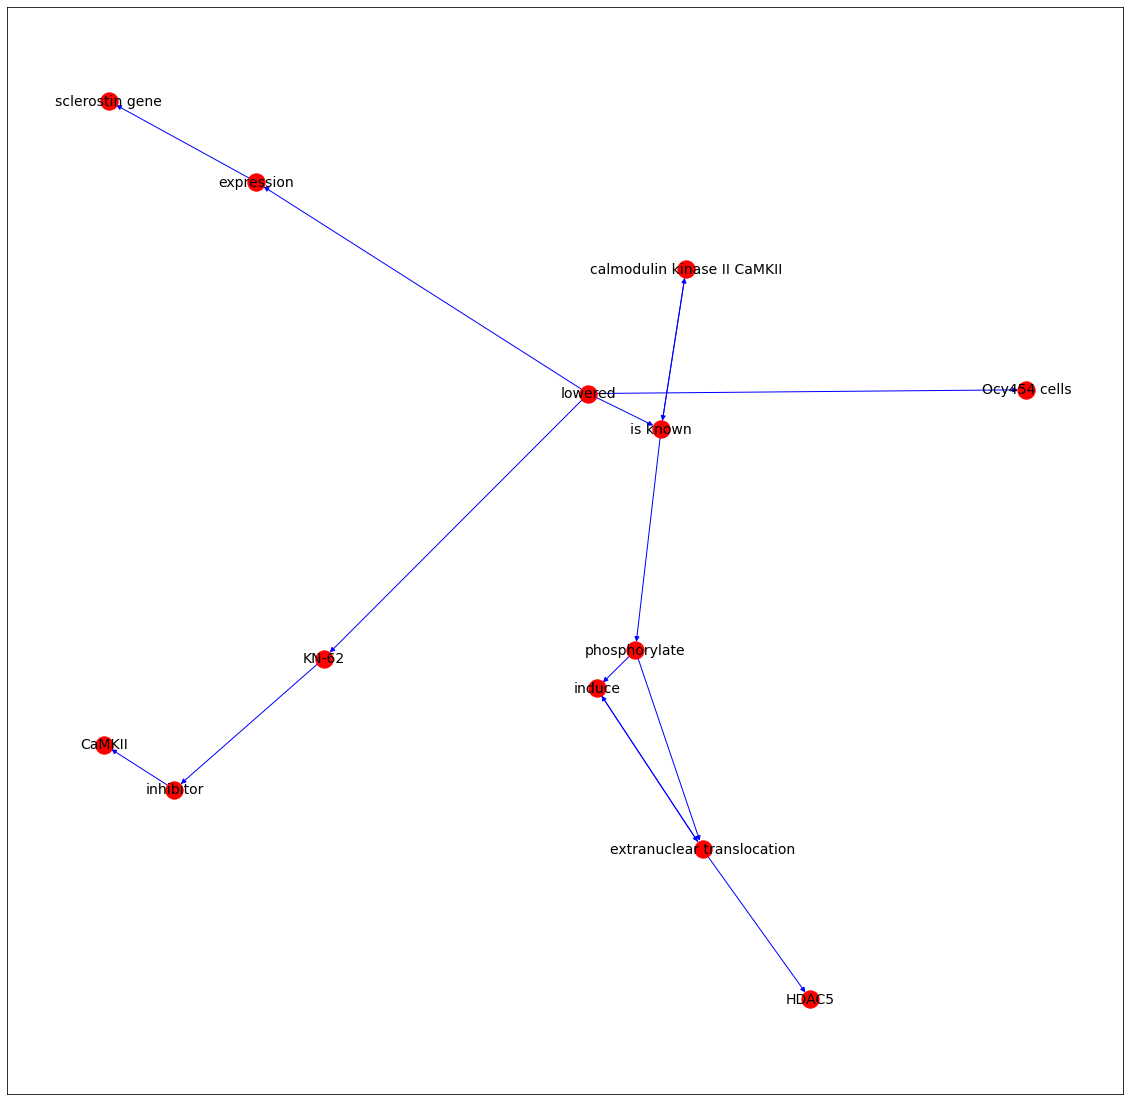

In [45]:
bmt.sandboxRX7802(s) # Digraph on VERBs and NOUNs

Prev size: 35 Vs. Next size 30
Prev size: 30 Vs. Next size 29
Prev size: 29 Vs. Next size 28
Prev size: 28 Vs. Next size 28


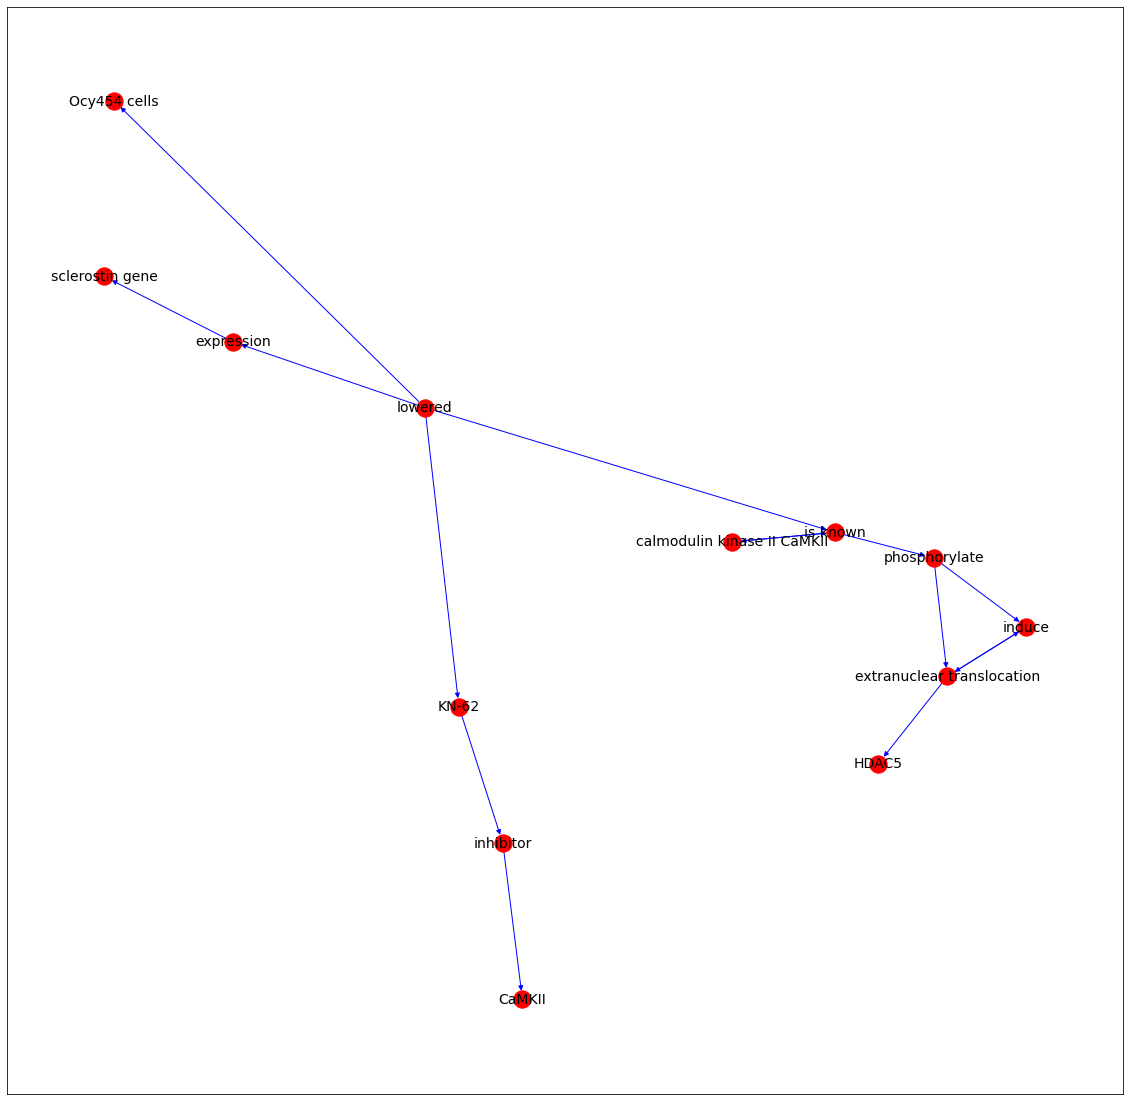

True

In [46]:
doc = bmt.dynamicTokenizer(nlp=pretokenized_nlp, text=s)
G = bmt.createTokenDiGraphwithContractionRX7802(doc) # this version correctly analyse the relative clause except some additional paths are needed
bmt.plot_network(G)
'KN-62' in G.nodes

In [47]:
nlp = stanza.Pipeline(lang='en', package='craft', processors={'ner':'bionlp13cg'})
doc = nlp(s)
entities = []
for ent in doc.entities:
    print(f'{ent.text}')
    if ent.text in entities:
        pass
    else:
        entities.append(ent.text)

2022-03-06 13:38:08 INFO: Loading these models for language: en (English):
| Processor | Package    |
--------------------------
| tokenize  | craft      |
| pos       | craft      |
| lemma     | craft      |
| depparse  | craft      |
| ner       | bionlp13cg |

2022-03-06 13:38:08 INFO: Use device: cpu
2022-03-06 13:38:08 INFO: Loading: tokenize
2022-03-06 13:38:08 INFO: Loading: pos
2022-03-06 13:38:08 INFO: Loading: lemma
2022-03-06 13:38:08 INFO: Loading: depparse
2022-03-06 13:38:08 INFO: Loading: ner
2022-03-06 13:38:09 INFO: Done loading processors!


calmodulin kinase II
CaMKII
HDAC5
KN-62
CaMKII
sclerostin
Ocy454 cells


In [48]:
G = bmt.updateNodeWt(G)
G = bmt.updateEntWt(G, doc)
G = bmt.updateEdgeWt(G)

['calmodulin kinase II', 'CaMKII', 'HDAC5', 'KN-62', 'CaMKII', 'sclerostin', 'Ocy454 cells']


In [49]:
edge = nx.get_edge_attributes(G, 'weight')
edge

{('calmodulin kinase II CaMKII', 'is known'): 20.085536923187668,
 ('is known', 'calmodulin kinase II CaMKII'): 20.085536923187668,
 ('is known', 'phosphorylate'): 54.598150033144236,
 ('induce', 'extranuclear translocation'): 20.085536923187668,
 ('extranuclear translocation', 'induce'): 20.085536923187668,
 ('extranuclear translocation', 'HDAC5'): 12.182493960703473,
 ('lowered', 'is known'): 54.598150033144236,
 ('lowered', 'KN-62'): 33.11545195869231,
 ('lowered', 'expression'): 20.085536923187668,
 ('lowered', 'Ocy454 cells'): 33.11545195869231,
 ('phosphorylate', 'induce'): 54.598150033144236,
 ('phosphorylate', 'extranuclear translocation'): 20.085536923187668,
 ('KN-62', 'inhibitor'): 12.182493960703473,
 ('inhibitor', 'CaMKII'): 12.182493960703473,
 ('expression', 'sclerostin gene'): 7.38905609893065}

In [50]:
%%time
from itertools import permutations, combinations
all_paths = []
ent_nodes = list(set(bmt.extractTokensOfInterestfmGraph(G, entities)))
print (ent_nodes)
node_pairs = permutations(ent_nodes, 2) # source and target must be distinguished in DiGraph
for pair in node_pairs:
    print (pair)
    sp = nx.all_simple_paths(G, source=pair[0], target=pair[1])
    for path in sp:
        all_paths.append(path)

['calmodulin kinase II CaMKII', 'KN-62', 'sclerostin gene', 'HDAC5', 'Ocy454 cells', 'CaMKII', 'extranuclear translocation']
('calmodulin kinase II CaMKII', 'KN-62')
('calmodulin kinase II CaMKII', 'sclerostin gene')
('calmodulin kinase II CaMKII', 'HDAC5')
('calmodulin kinase II CaMKII', 'Ocy454 cells')
('calmodulin kinase II CaMKII', 'CaMKII')
('calmodulin kinase II CaMKII', 'extranuclear translocation')
('KN-62', 'calmodulin kinase II CaMKII')
('KN-62', 'sclerostin gene')
('KN-62', 'HDAC5')
('KN-62', 'Ocy454 cells')
('KN-62', 'CaMKII')
('KN-62', 'extranuclear translocation')
('sclerostin gene', 'calmodulin kinase II CaMKII')
('sclerostin gene', 'KN-62')
('sclerostin gene', 'HDAC5')
('sclerostin gene', 'Ocy454 cells')
('sclerostin gene', 'CaMKII')
('sclerostin gene', 'extranuclear translocation')
('HDAC5', 'calmodulin kinase II CaMKII')
('HDAC5', 'KN-62')
('HDAC5', 'sclerostin gene')
('HDAC5', 'Ocy454 cells')
('HDAC5', 'CaMKII')
('HDAC5', 'extranuclear translocation')
('Ocy454 cells'

In [51]:
for i, p in enumerate(all_paths):
    print (i+1,'=',p) 

1 = ['calmodulin kinase II CaMKII', 'is known', 'phosphorylate', 'induce', 'extranuclear translocation', 'HDAC5']
2 = ['calmodulin kinase II CaMKII', 'is known', 'phosphorylate', 'extranuclear translocation', 'HDAC5']
3 = ['calmodulin kinase II CaMKII', 'is known', 'phosphorylate', 'induce', 'extranuclear translocation']
4 = ['calmodulin kinase II CaMKII', 'is known', 'phosphorylate', 'extranuclear translocation']
5 = ['KN-62', 'inhibitor', 'CaMKII']
6 = ['extranuclear translocation', 'HDAC5']


Follow-up:
1. Tally the entities
2. Run the dynamic tokenizer
3. Create Graph on full sentence and DiGraph on stripped sentence
4. Combine the subgraphs generated from step #3
5. Run the subgraphs through graph machine learning.
6. Obtain the embedings that maximize the triplet relationshipm, i.e. (ent_1, interaction, ent_2)